<a href="https://colab.research.google.com/github/Mal-Lem/Segmentation-Clients/blob/main/Segmentation_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentation des Clients**

# 1) Busniss undrestanding


 L'entreprise souhaite mieux comprendre ses clients afin de mieux les cibler avec des offres et des stratégies marketing adaptées. L'objectif principal est de segmenter les clients en groupes ayant des comportements similaires.

**Objectifs commerciaux :**

  * Optimisation des campagnes marketing : Personnaliser les campagnes en fonction des segments de clients pour augmenter le taux de conversion.

  * Amélioration de la fidélité : Adapter les stratégies de fidélisation en fonction des segments, en proposant des produits ou services qui correspondent aux besoins spécifiques de chaque groupe.

  * Maximisation des revenus : Identifier les segments les plus rentables et les cibler spécifiquement avec des promotions.

ensemble de données utilisé: https://www.kaggle.com/datasets/shwetabh123/mall-customers

# 2) Data understanding

In [153]:
import warnings
warnings.filterwarnings("ignore")

In [154]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns

url = "/content/Mall_Customers.csv"
data = pd.read_csv(url)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [155]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [157]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [158]:
df = pd.DataFrame(data)
# transformer les colonnes non numérique
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [159]:
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


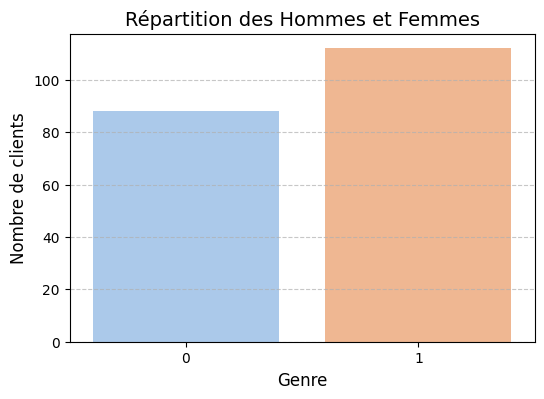

In [160]:
gender_counts = df["Gender"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")

plt.title("Répartition des Hommes et Femmes", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de clients", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


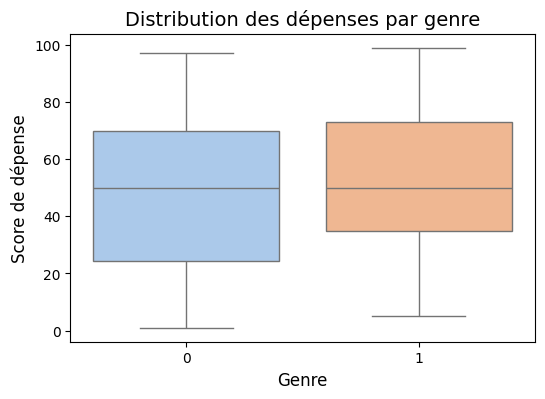

In [161]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, palette="pastel")

plt.title("Distribution des dépenses par genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Score de dépense", fontsize=12)

plt.show()


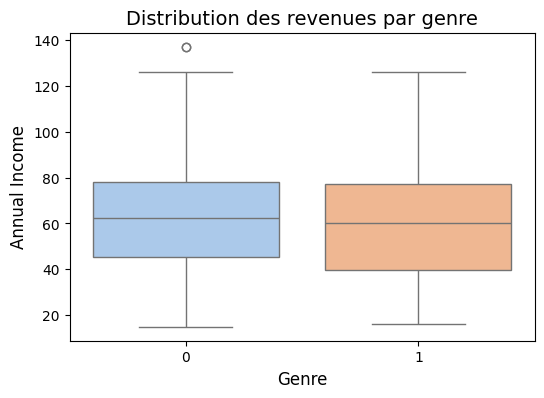

In [162]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Gender", y="Annual Income (k$)", data=df, palette="pastel")

plt.title("Distribution des revenues par genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Annual Income", fontsize=12)

plt.show()

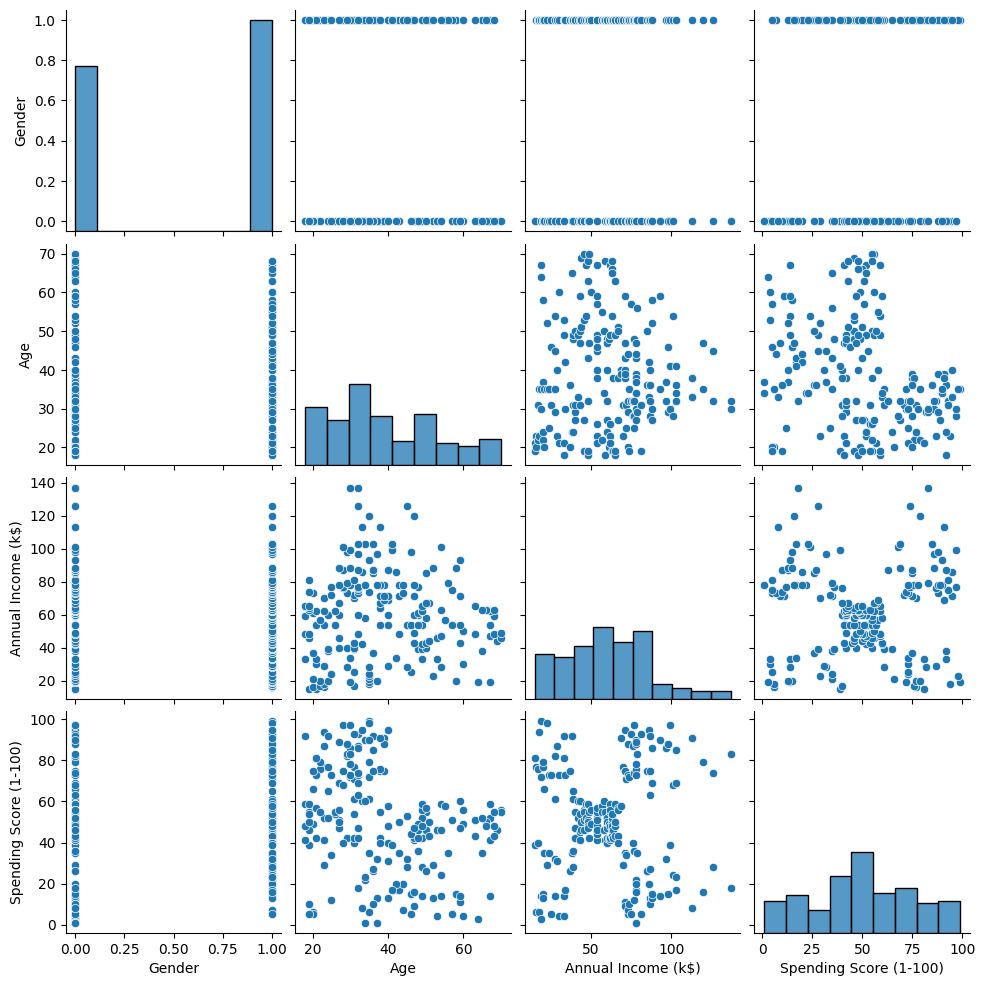

In [163]:
sns.pairplot(data=df)

**Corrélations linéaires :**

  Si deux variables sont fortement corrélées, les points s’aligneront assez bien le long d’une droite).

  Si les points sont dispersés sans forme particulière, cela suggère qu'il n'y a pas de corrélation linéaire forte entre les deux variables.

**Corrélations non linéaires :**

  Si la relation entre deux variables forme une courbe ou une autre forme géométrique, cela suggère une corrélation non linéaire. Par exemple, un pairplot peut montrer une relation quadratique (forme parabolique)

**Distributions individuelles :**

  Les histogrammes permettent d'observer la répartition de chaque variable. Cela peut vous aider à voir si les variables sont symétriques, biaisées, uniformes, ou suivent une distribution particulière (comme normale, exponentielle, etc.).


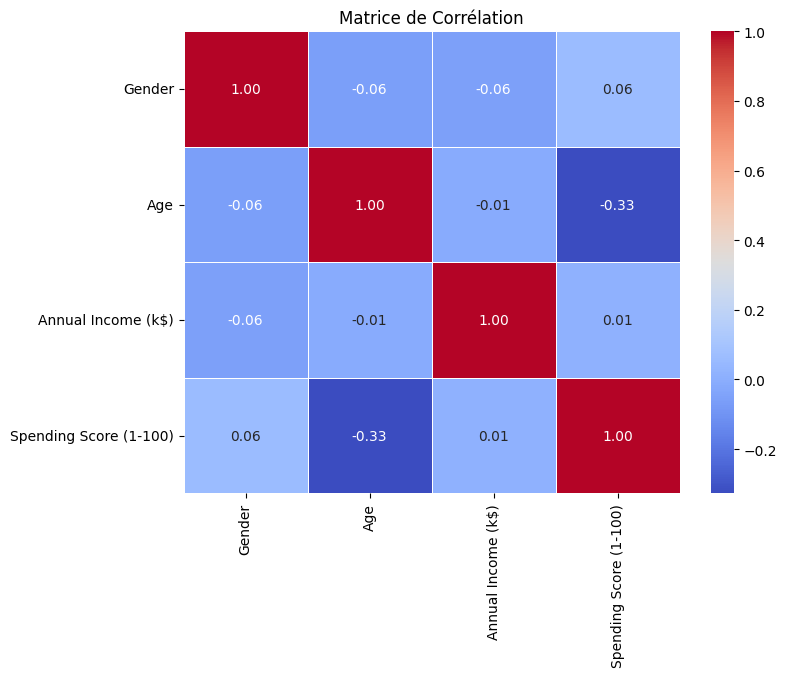

In [164]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


# 3) Data Preparation

In [165]:
df = df.drop('Gender', axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [166]:
X = df.drop('Age', axis=1)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Standardisation des données pour K-Means**
c'est l'une des conditions nécessaire à avoir pour appliquer l K-means pour centrer (moyenne = 0) et réduire (écart-type = 1)

StandardScaler : z = ( X − μ) / σ

In [167]:
moyenne = X.mean(axis=0)
ecart_type = X.std(axis=0)

print("moyenne avant standardisation :")
print(moyenne)

print("\nécart type avant standardisation :")
print(ecart_type)

moyenne avant standardisation :
Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

écart type avant standardisation :
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64


In [168]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


toutes les valeurs sont autours de 0 parfait!!

In [169]:
moyenne_scaled = X_scaled.mean(axis=0)
ecart_type_scaled = X_scaled.std(axis=0)

print("\nmoyenne après standardisation :")
print(moyenne_scaled)

print("\nécart type après standardisation :")
print(ecart_type_scaled)


moyenne après standardisation :
[-2.13162821e-16 -1.46549439e-16]

écart type après standardisation :
[1. 1.]


**Trouver le bon nombre de clusters avec la methode de coude (elbow methode)** :    
 basée sur la recherche du point où l'ajout de nouveaux clusters ne permet plus d'améliorer significativement la qualité du clustering

In [170]:
inertie = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=400, random_state=22)
    kmeans.fit(X_scaled)
    inertie.append(kmeans.inertia_)

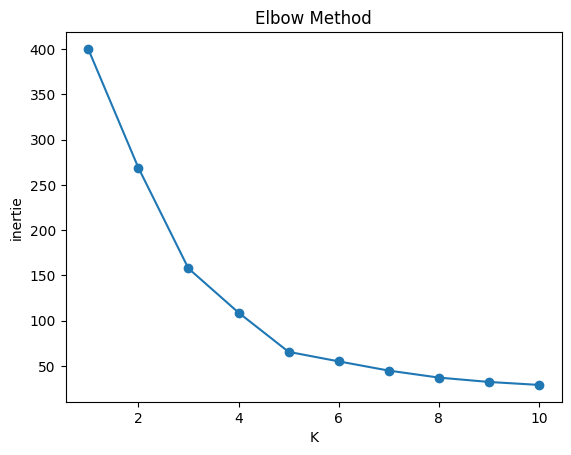

In [171]:
plt.plot(range(1, 11), inertie, marker='o')
plt.xlabel('K')
plt.ylabel('inertie')
plt.title('Elbow Method')
plt.show()

On choisit le k où l'inertie commence à diminuer lentement

**Validation du choix de k avec le Silhouette Score**

In [172]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score pour k={n_clusters} : {silhouette_avg:.2f}")


Silhouette Score pour k=5 : 0.55


* Si le score est proche de 1 ➝ les clusters sont bien séparés et cohérents.
* Si le score est bas (< 0.5) ➝ les clusters se mélangent et k doit être ajusté

# 4) Modeling

Pourquoi le choix de KMeans ?

  * KMeans est rapide, simple à implémenter et interpréter

  * Il est bien adapté à la segmentation basée sur des distances entre individus

  * Le jeu de données est non-labellisé, donc un algorithme de clustering non supervisé est approprié

  * On souhaite identifier des profils clients similaires, ce que fait KMeans efficacement

  * Facilement combinable avec des visualisations pour analyser les groupes formés

In [173]:
kmeans = KMeans(n_clusters=5, n_init=400, random_state=22)
kmeans.fit(X_scaled)

# entrainer puis predir
clusters = kmeans.labels_
centroids_scaled = kmeans.cluster_centers_

centroids = scaler.inverse_transform(centroids_scaled)

# creation cluster
df['Clusters'] = clusters


In [174]:
nom_segments = {
    0: 'Clients fidèles mais modestes',
    1: 'Consommateurs réguliers',
    2: 'Clients économes',
    3: 'Clients dormants',
    4: 'Clients premium'
}
# créer une colonne 'Segment' avec les noms significatifs
df['Segment'] = df['Clusters'].map(nom_segments)

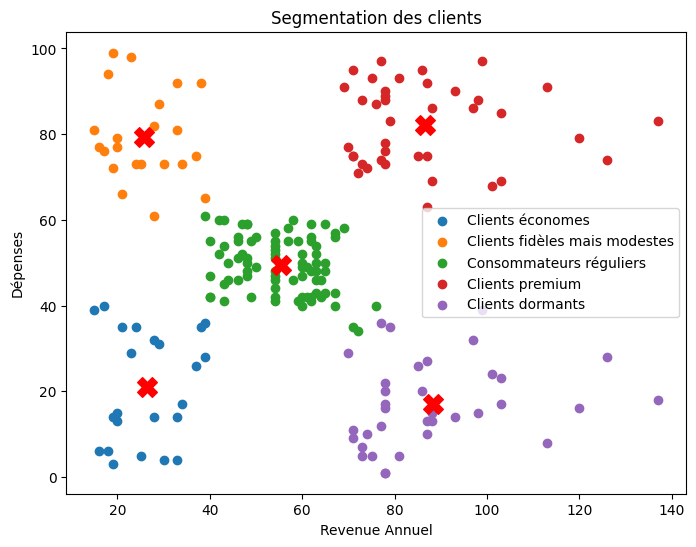

In [175]:
plt.figure(figsize=(8, 6))

for nom_segment in df['Segment'].unique():
    cluster_data = df[df['Segment'] == nom_segment]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=nom_segment)

for i, center in enumerate(centroids):
    plt.scatter(center[0], center[1], c='red', s=200, marker='X')

plt.xlabel('Revenue Annuel')
plt.ylabel('Dépenses')
plt.title('Segmentation des clients')
plt.legend()
plt.show()

Ces interprétations permettent de construire des stratégies marketing ciblées, par exemple :

  * Récompenser les clients premium

  * Réactiver les clients dormants

  * Fidéliser les consommateurs réguliers

# 5) Evaluation

In [176]:
new_data = pd.DataFrame({
    'Annual Income (k$)': [60, 70, 80],
    'Spending Score (1-100)': [10, 55, 80]
})

# standardiser les nouvelles données avec le même scaler
new_data_scaled = scaler.transform(new_data)

# prédire les clusters pour les nouvelles données
new_clusters = kmeans.predict(new_data_scaled)

#sil_score = silhouette_score(X_scaled, kmeans.labels_)
#print("Silhouette Score:", sil_score)

new_data['Predicted Cluster'] = new_clusters
print(new_data)


   Annual Income (k$)  Spending Score (1-100)  Predicted Cluster
0                  60                      10                  3
1                  70                      55                  1
2                  80                      80                  4


# 6) Deployment

In [177]:
import pickle

# Après avoir entraîné ton modèle
with open("model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Et si tu as un scaler :
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [178]:
# Génération du fichier dashboard.py avec toutes les fonctionnalités demandées

code = '''
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chargement du modèle et du scaler
model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

st.set_page_config(page_title="Segmentation Clients", layout="wide")
st.title("🎯 Segmentation des Clients - Dashboard Interactif")

# Chargement des données
uploaded_file = st.file_uploader("📂 Importer un fichier CSV (colonnes: CustomerID, Gender, Age, Annual Income, Spending Score)", type=["csv"])

if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.success("✅ Fichier importé avec succès")
else:
    if os.path.exists("Mall_Customers.csv"):
        data = pd.read_csv("Mall_Customers.csv")
        st.warning("⚠️ Aucun fichier importé. Utilisation du dataset par défaut.")
    else:
        st.error("❌ Aucun fichier importé et 'Mall_Customers.csv' introuvable.")
        st.stop()

# Nettoyage et préparation
df = data.copy()
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

features = ['Annual Income (k$)', 'Spending Score (1-100)']

X = df[features]
scaled_data = scaler.transform(X)
df['Cluster'] = model.predict(scaled_data)

# Mapping des clusters (modifiable selon ton analyse)
noms_clusters = {
    0: 'Clients fidèles mais modestes',
    1: 'Consommateurs réguliers',
    2: 'Clients économes',
    3: 'Clients dormants',
    4: 'Clients premium'
}
df['Segment'] = df['Cluster'].map(noms_clusters)

# AFFICHAGES
st.header("👁️‍🗨️ Aperçu des Données")
st.dataframe(df.head())

st.header("📊 Statistiques Descriptives")
st.dataframe(df.describe())

# Visualisations
st.header("📈 Visualisations")

col1, col2 = st.columns(2)
with col1:
    st.subheader("Distribution de l'âge")
    fig1, ax1 = plt.subplots()
    sns.histplot(df['Age'], kde=True, ax=ax1)
    st.pyplot(fig1)

with col2:
    if 'Gender' in df.columns:
        st.subheader("Répartition par genre")
        fig2, ax2 = plt.subplots()
        sns.countplot(x='Gender', data=df, ax=ax2)
        st.pyplot(fig2)

st.subheader("🧮 Scatter Plot - Income vs Score (avec clusters)")
fig3, ax3 = plt.subplots()
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', ax=ax3)
st.pyplot(fig3)

# Analyse des clusters
st.header("🧠 Analyse des Segments")
cluster_counts = df['Segment'].value_counts()
st.bar_chart(cluster_counts)

st.subheader("📌 Moyenne des variables par Cluster")
st.dataframe(df.groupby('Segment')[features].mean())

# PCA pour visualisation 2D des clusters
st.subheader("🎨 Visualisation 2D des Clusters (PCA)")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

fig4, ax4 = plt.subplots()
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', ax=ax4)
st.pyplot(fig4)

# Export des résultats
st.header("📥 Exporter les Résultats")
csv = df.to_csv(index=False).encode('utf-8')
st.download_button("📁 Télécharger le fichier avec clusters", data=csv, file_name='segmentation_clients.csv', mime='text/csv')
'''

with open("dashboard.py", "w") as f:
    f.write(code)

In [179]:
!pip install streamlit pyngrok

In [180]:
!ngrok config add-authtoken 2wsDQ2OHR6pWYbeIqKtezpKVFP0_75xqMP9aTQLQN6vB8NXg

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [181]:
from pyngrok import ngrok
import time

# Démarrer le tunnel
public_url = ngrok.connect(8501)
print("Public URL:", public_url)

# Lancer l'app Streamlit
!streamlit run dashboard.py &

# Attendre que l'app démarre
time.sleep(5)


Public URL: NgrokTunnel: "https://43a3-34-75-195-37.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.195.37:8501

  Stopping...


# 7) Synthèse sur le projet :

Ce projet met en œuvre un pipeline de segmentation client complet, de l’ingestion des données jusqu’au déploiement d’une application interactive via Streamlit. Grâce à l’utilisation de KMeans, nous avons pu identifier des profils clients clairs et exploitables. Ce système permet aux équipes marketing de :

    * Mieux comprendre leur base client

    * Cibler leurs actions commerciales

    * Suivre l’évolution des comportements clients dans le temps

Le projet a été conçu pour être reproductible, interactif et facilement déployable, notamment via une application Streamlit connectée à un modèle préentraîné

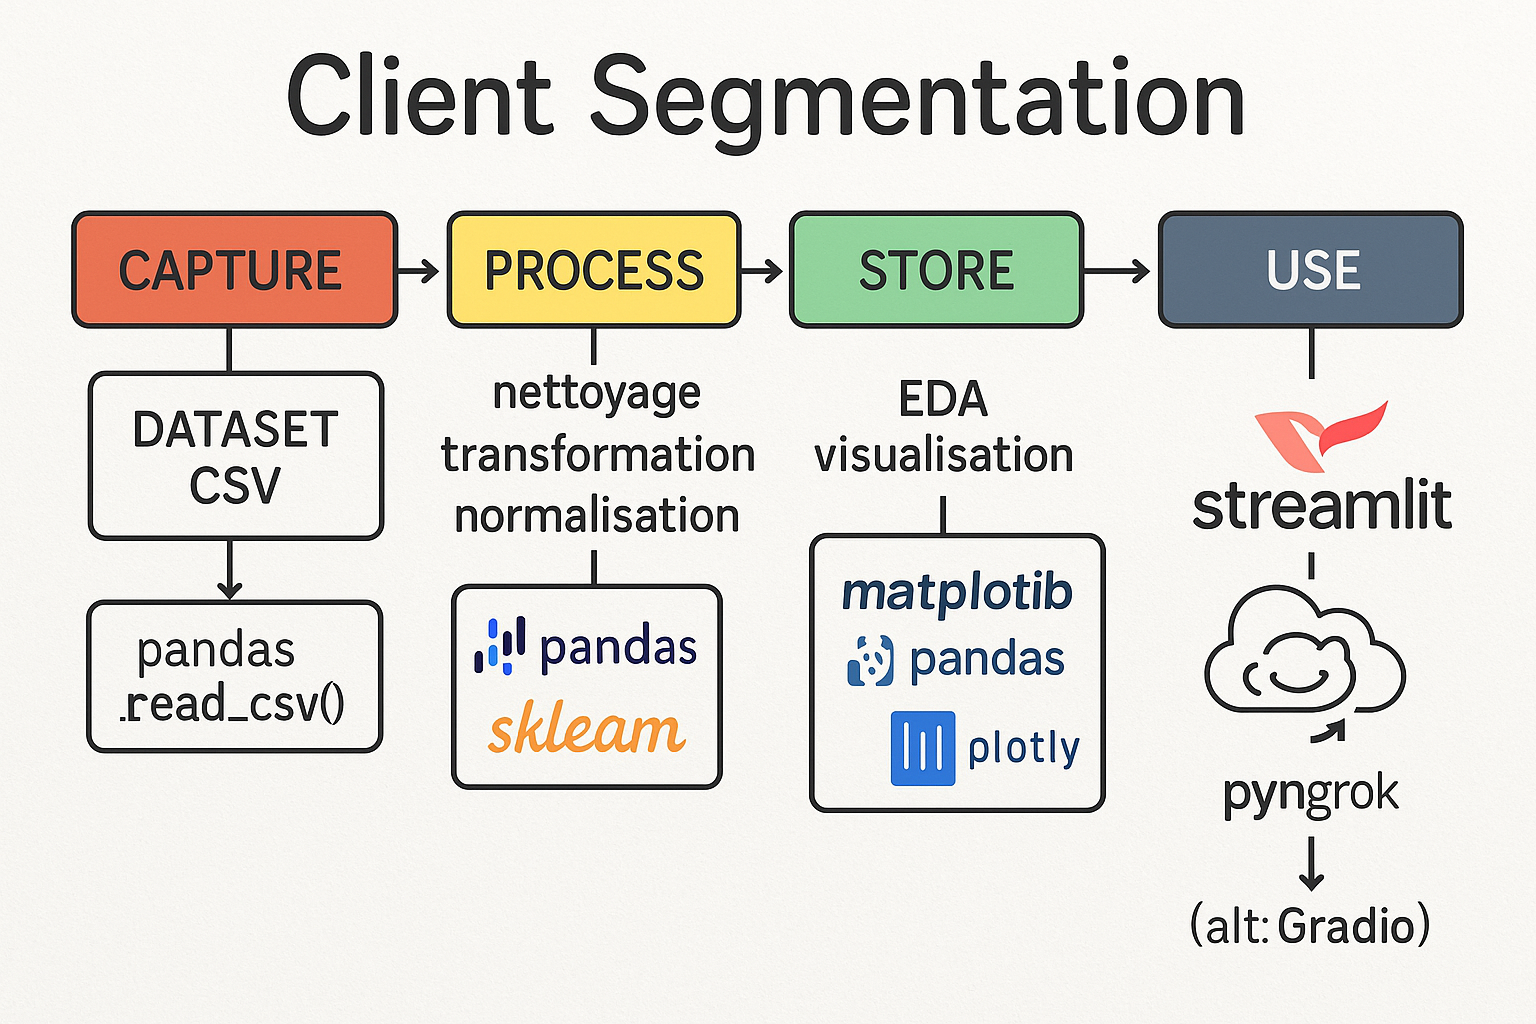